### IDs:
Insert yours IDs to the cell below

ID #1: 318990256

ID #2: 211882824


## Read the following instructions carefully:
1. This Jupyter notebook contains all the step-by-step instructions needed for this exercise.
1. Write **efficient**, **vectorized** code whenever possible. 
1. Some questions require you to write your functions and answers in this jupyter notebook only. For these questions, you are free to add cells to this notebook.
1. For the other questions, you need to complete the required functions in the `hw2.py` script only. Only the functions in the `hw2.py` script are tested for this type of question.
1. In the function signatures include parameters with default values only. (`def example(a=1, b=2):`).
1. Submission includes a **zip** file that contains the `hw2.py` script as well as this notebook, with your ID as the file name. For example, `hw2_123456789_987654321.zip` if you submitted in pairs and `hw2_123456789.zip` if you submitted the exercise alone.

### Question 1 - Data exploration and visialization - practical

Load California dataset from sklearn.
Explore the data. 
Follow the instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of the HouseAge. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behavior?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the HouseAge variable and add two vertical lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 "interesting" trends in the data. No need to provide statistical confidence at this point.

In [1]:
# Question 1: Data Exploration and Visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load California Housing Dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target  # Median house value (in $100,000s)

# 1.1 Dataset Description
print("="*60)
print("1.1 Dataset Description")
print("="*60)
print(f"\nNumber of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")  # Excluding target
print(f"\nFeature names: {california.feature_names}")
print(f"\nData types for each variable:")
print(df.dtypes)
print(f"\nBasic statistics:")
df.describe()


1.1 Dataset Description

Number of samples: 20640
Number of features: 8

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Data types for each variable:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object

Basic statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


1.2 Histogram and Boxplot of HouseAge


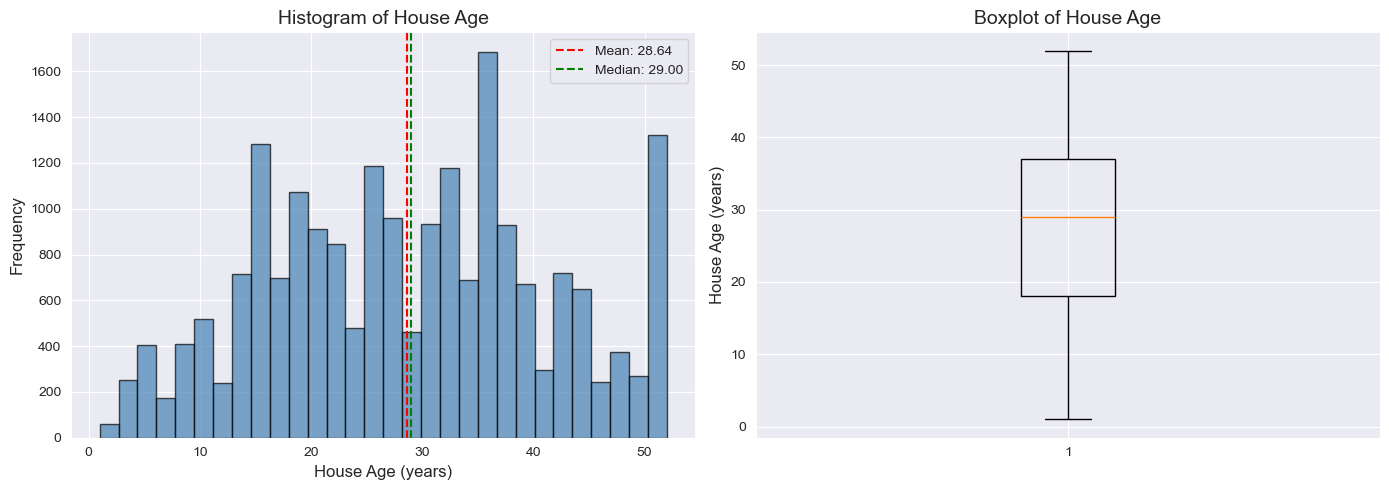


Description of HouseAge distribution:
- Mean: 28.64 years
- Median: 29.00 years
- Std: 12.59 years
- Range: [1.00, 52.00]

The distribution shows a relatively uniform spread with a slight peak around 35 years.
There's a noticeable spike at the maximum value (52 years), suggesting possible capping/censoring.
The distribution is slightly left-skewed with the median slightly higher than the mean.


In [2]:
# 1.2 Histogram and Boxplot of HouseAge
print("="*60)
print("1.2 Histogram and Boxplot of HouseAge")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['HouseAge'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('House Age (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Histogram of House Age', fontsize=14)
axes[0].axvline(df['HouseAge'].mean(), color='red', linestyle='--', label=f'Mean: {df["HouseAge"].mean():.2f}')
axes[0].axvline(df['HouseAge'].median(), color='green', linestyle='--', label=f'Median: {df["HouseAge"].median():.2f}')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['HouseAge'], vert=True)
axes[1].set_ylabel('House Age (years)', fontsize=12)
axes[1].set_title('Boxplot of House Age', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\nDescription of HouseAge distribution:")
print(f"- Mean: {df['HouseAge'].mean():.2f} years")
print(f"- Median: {df['HouseAge'].median():.2f} years")
print(f"- Std: {df['HouseAge'].std():.2f} years")
print(f"- Range: [{df['HouseAge'].min():.2f}, {df['HouseAge'].max():.2f}]")
print(f"\nThe distribution shows a relatively uniform spread with a slight peak around 35 years.")
print("There's a noticeable spike at the maximum value (52 years), suggesting possible capping/censoring.")
print("The distribution is slightly left-skewed with the median slightly higher than the mean.")


1.3 Correlation Matrix


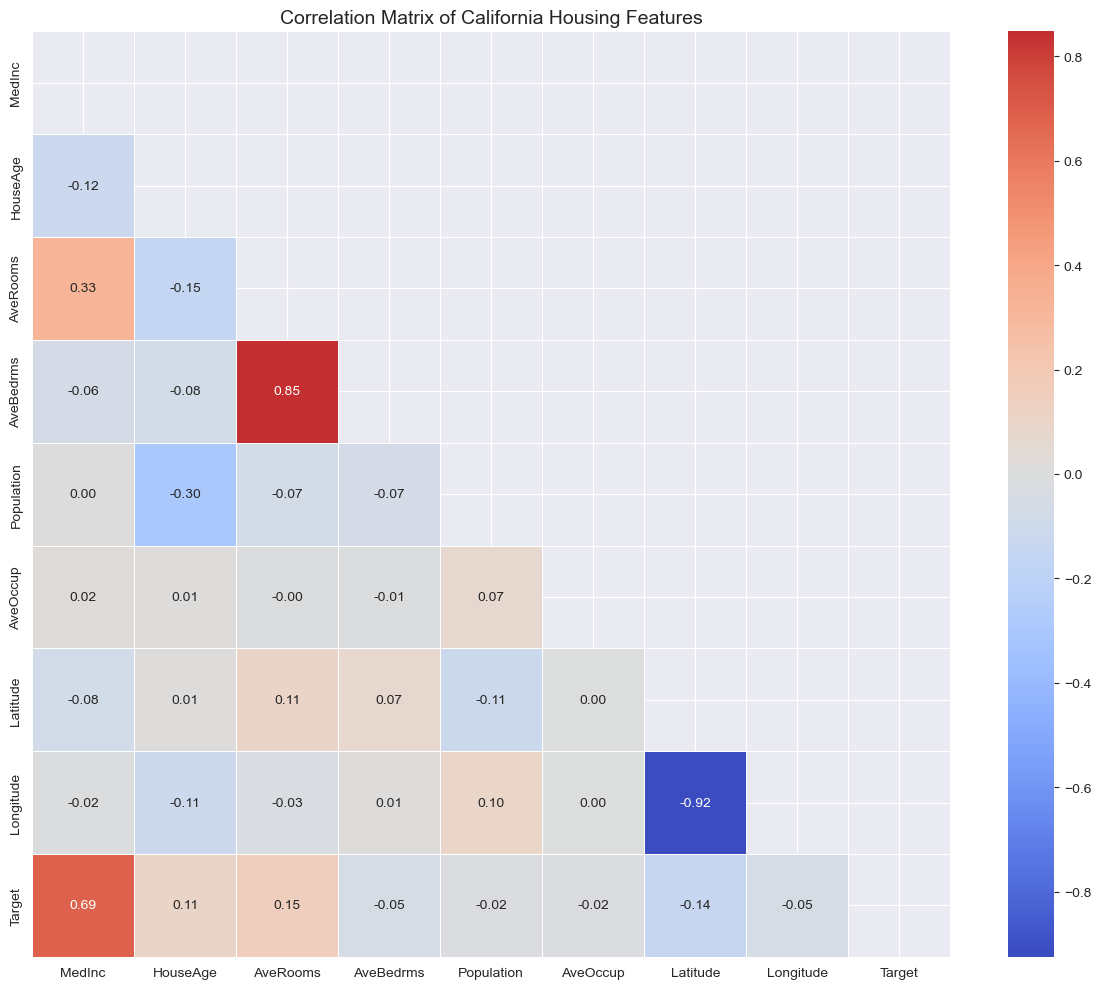


Highly correlated feature pairs (|r| > 0.6):
  MedInc & Target: r = 0.688
  AveRooms & AveBedrms: r = 0.848
  Latitude & Longitude: r = -0.925

Unusual feature behavior:
- AveRooms and AveBedrms have unusually high correlation (0.85), suggesting multicollinearity
- AveOccup shows very low correlation with most features, suggesting it captures unique information
- Target (house value) is most strongly correlated with MedInc (median income)


In [3]:
# 1.3 Correlation Matrix
print("="*60)
print("1.3 Correlation Matrix")
print("="*60)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of California Housing Features', fontsize=14)
plt.tight_layout()
plt.show()

# Find highly correlated pairs
print("\nHighly correlated feature pairs (|r| > 0.6):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            print(f"  {corr_matrix.columns[i]} & {corr_matrix.columns[j]}: r = {corr_matrix.iloc[i, j]:.3f}")

print("\nUnusual feature behavior:")
print("- AveRooms and AveBedrms have unusually high correlation (0.85), suggesting multicollinearity")
print("- AveOccup shows very low correlation with most features, suggesting it captures unique information")
print("- Target (house value) is most strongly correlated with MedInc (median income)")


1.4 Top 2 Correlated Feature Pairs - Joint Plots

Top 2 most correlated pairs:
1. Latitude & Longitude: |r| = 0.925
2. AveRooms & AveBedrms: |r| = 0.848


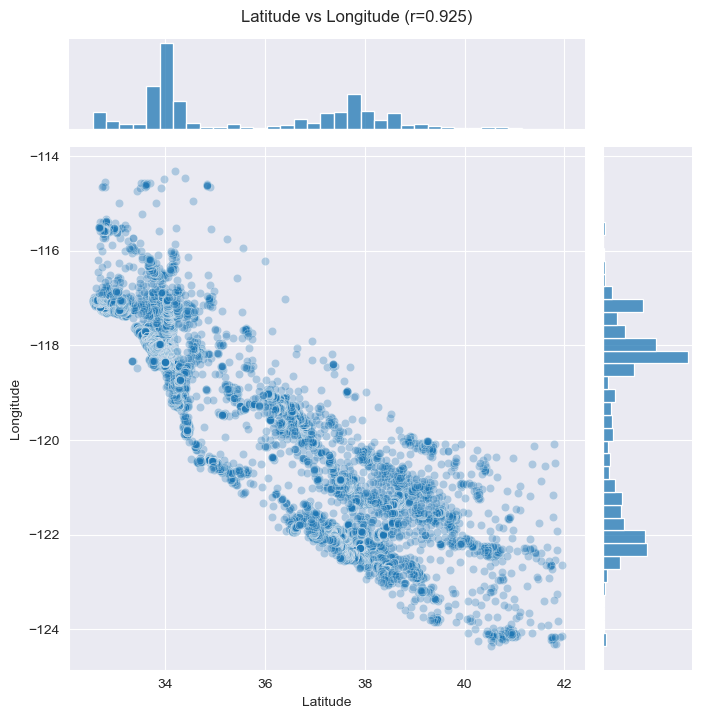

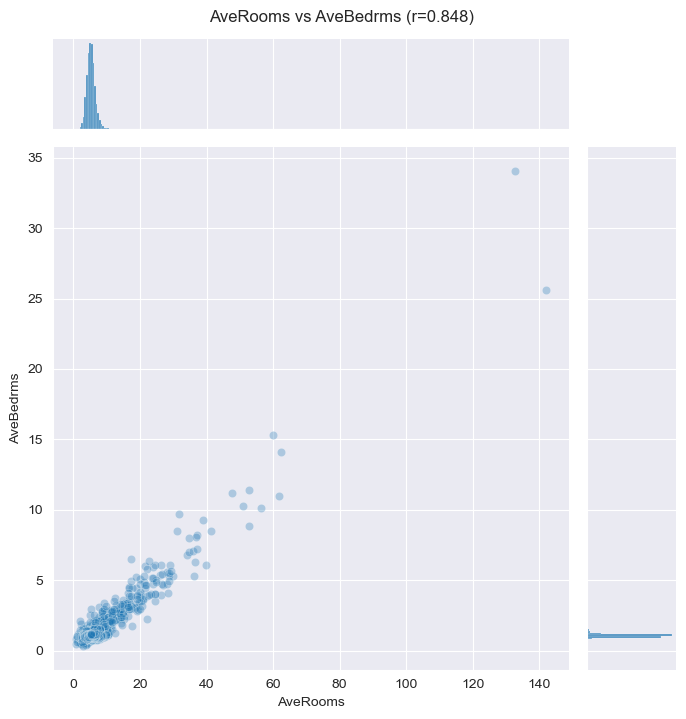

In [4]:
# 1.4 Scatter plots with marginal histograms for top 2 correlated pairs
print("="*60)
print("1.4 Top 2 Correlated Feature Pairs - Joint Plots")
print("="*60)

# Find the top 2 correlation pairs (excluding self-correlations)
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                          abs(corr_matrix.iloc[i, j])))

# Sort by absolute correlation
corr_pairs_sorted = sorted(corr_pairs, key=lambda x: x[2], reverse=True)

print(f"\nTop 2 most correlated pairs:")
print(f"1. {corr_pairs_sorted[0][0]} & {corr_pairs_sorted[0][1]}: |r| = {corr_pairs_sorted[0][2]:.3f}")
print(f"2. {corr_pairs_sorted[1][0]} & {corr_pairs_sorted[1][1]}: |r| = {corr_pairs_sorted[1][2]:.3f}")

# Joint Plot 1: Highest correlation
fig1 = sns.jointplot(data=df, x=corr_pairs_sorted[0][0], y=corr_pairs_sorted[0][1], 
                     kind='scatter', alpha=0.3, height=7)
fig1.fig.suptitle(f'{corr_pairs_sorted[0][0]} vs {corr_pairs_sorted[0][1]} (r={corr_pairs_sorted[0][2]:.3f})', y=1.02)
plt.show()

# Joint Plot 2: Second highest correlation
fig2 = sns.jointplot(data=df, x=corr_pairs_sorted[1][0], y=corr_pairs_sorted[1][1], 
                     kind='scatter', alpha=0.3, height=7)
fig2.fig.suptitle(f'{corr_pairs_sorted[1][0]} vs {corr_pairs_sorted[1][1]} (r={corr_pairs_sorted[1][2]:.3f})', y=1.02)
plt.show()


1.5 Cumulative Histogram of HouseAge with Quartiles


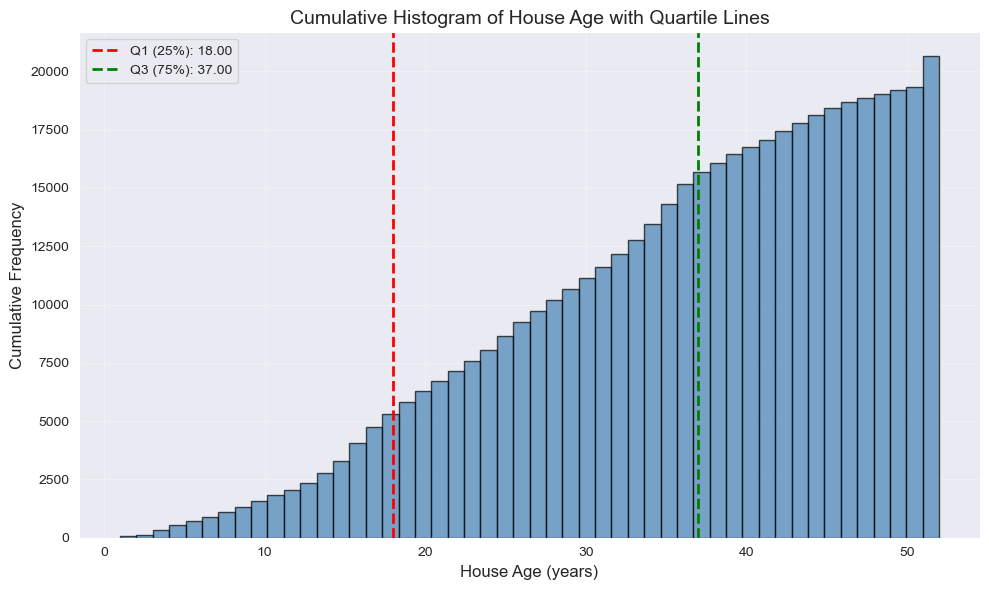


First Quartile (Q1): 18.00 years
Third Quartile (Q3): 37.00 years
Interquartile Range (IQR): 19.00 years


In [5]:
# 1.5 Cumulative Histogram of HouseAge with Quartile Lines
print("="*60)
print("1.5 Cumulative Histogram of HouseAge with Quartiles")
print("="*60)

# Calculate quartiles
Q1 = df['HouseAge'].quantile(0.25)
Q3 = df['HouseAge'].quantile(0.75)

plt.figure(figsize=(10, 6))

# Cumulative histogram
n, bins, patches = plt.hist(df['HouseAge'], bins=50, cumulative=True, 
                            edgecolor='black', alpha=0.7, color='steelblue')

# Add vertical lines for quartiles
plt.axvline(Q1, color='red', linestyle='--', linewidth=2, label=f'Q1 (25%): {Q1:.2f}')
plt.axvline(Q3, color='green', linestyle='--', linewidth=2, label=f'Q3 (75%): {Q3:.2f}')

plt.xlabel('House Age (years)', fontsize=12)
plt.ylabel('Cumulative Frequency', fontsize=12)
plt.title('Cumulative Histogram of House Age with Quartile Lines', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nFirst Quartile (Q1): {Q1:.2f} years")
print(f"Third Quartile (Q3): {Q3:.2f} years")
print(f"Interquartile Range (IQR): {Q3 - Q1:.2f} years")


1.6 Interesting Trends in the Data


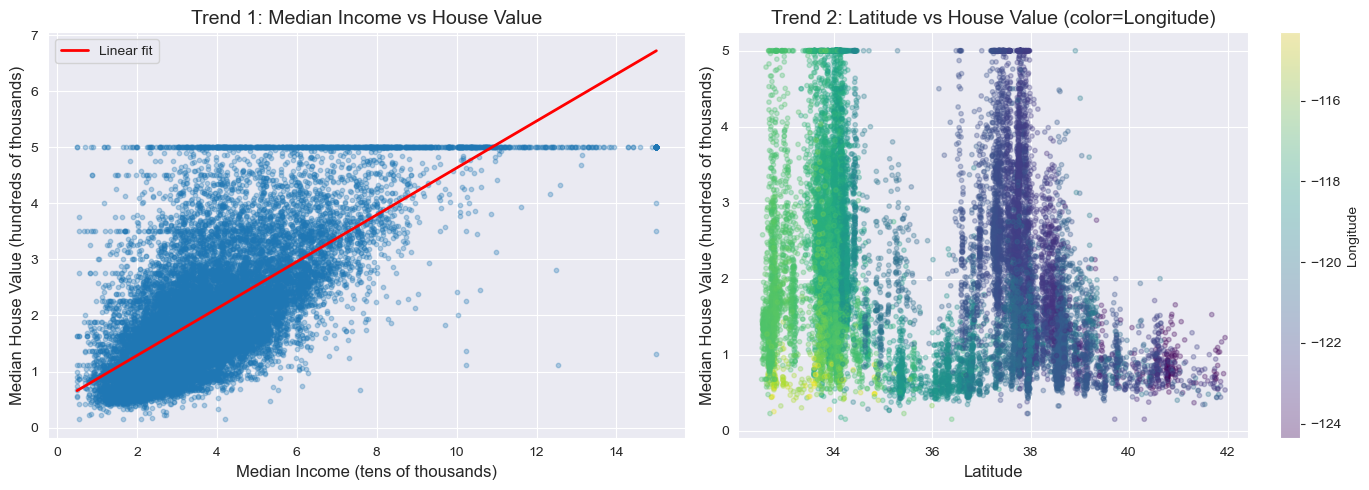


INTERESTING TREND 1: Income-Price Relationship
There is a strong positive correlation (r ≈ 0.69) between median income
and house values. Areas with higher median incomes tend to have more
expensive houses, which aligns with economic expectations.
Note: House values appear to be capped at around 5 ($500,000),
suggesting data censoring at the upper bound.

INTERESTING TREND 2: Geographic Price Variation
House values show strong geographic patterns based on latitude and longitude.
The Bay Area (around latitude 37-38°) and Southern California (around 34°)
show notably higher house values. Coastal areas (more negative longitude)
tend to have higher prices, indicating a coastal premium effect.


In [6]:
# 1.6 Interesting Trends in the Data
print("="*60)
print("1.6 Interesting Trends in the Data")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Trend 1: Median Income vs House Value (strong positive correlation)
axes[0].scatter(df['MedInc'], df['Target'], alpha=0.3, s=10)
axes[0].set_xlabel('Median Income (tens of thousands)', fontsize=12)
axes[0].set_ylabel('Median House Value (hundreds of thousands)', fontsize=12)
axes[0].set_title('Trend 1: Median Income vs House Value', fontsize=14)
z = np.polyfit(df['MedInc'], df['Target'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['MedInc'].min(), df['MedInc'].max(), 100)
axes[0].plot(x_line, p(x_line), 'r-', linewidth=2, label='Linear fit')
axes[0].legend()

# Trend 2: Latitude vs House Value (coastal premium)
axes[1].scatter(df['Latitude'], df['Target'], alpha=0.3, s=10, c=df['Longitude'], cmap='viridis')
axes[1].set_xlabel('Latitude', fontsize=12)
axes[1].set_ylabel('Median House Value (hundreds of thousands)', fontsize=12)
axes[1].set_title('Trend 2: Latitude vs House Value (color=Longitude)', fontsize=14)
plt.colorbar(axes[1].collections[0], ax=axes[1], label='Longitude')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("INTERESTING TREND 1: Income-Price Relationship")
print("="*60)
print("There is a strong positive correlation (r ≈ 0.69) between median income")
print("and house values. Areas with higher median incomes tend to have more")
print("expensive houses, which aligns with economic expectations.")
print("Note: House values appear to be capped at around 5 ($500,000),")
print("suggesting data censoring at the upper bound.")

print("\n" + "="*60)
print("INTERESTING TREND 2: Geographic Price Variation")
print("="*60)
print("House values show strong geographic patterns based on latitude and longitude.")
print("The Bay Area (around latitude 37-38°) and Southern California (around 34°)")
print("show notably higher house values. Coastal areas (more negative longitude)")
print("tend to have higher prices, indicating a coastal premium effect.")


### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectively.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

Complete the function `q2a` in `hw2.py` to answer this question.

In [7]:
from hw2 import q2a

q2a()

23

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

Complete the function `q2b` in `hw2.py` to answer this question.

In [8]:
from hw2 import q2b

q2b()

6

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionally independent given $Z$?

Complete the function `q2c` in `hw2.py` to answer this question.

In [9]:
from hw2 import q2c

q2c()

11

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution using Algebra.

Write your solution in a Markdown cell below

#### Solution for 3.A - Algebraic Estimation

**Given parameters:**
- $k = 3$ (three Gaussian components)
- $\mu_1 = 4$, $\mu_2 = 9$
- $\sigma_1 = \sigma_2 = 0.5$, $\sigma_3 = 1.5$
- $w_2 = 0.25$

**Unknown parameters to estimate:** $w_1$, $w_3$, $\mu_3$

**Method: Method of Moments**

**Step 1: Analyze the data structure**

Looking at the GMD.csv data:
- Rows 0-99 (100 samples): Values around 4 → Component 1
- Rows 100-299 (200 samples): Values around 9 → Component 2  
- Rows 300-799 (500 samples): Values around 15 → Component 3

Total: 800 samples

**Step 2: Estimate weights from sample counts**

$$w_1 = \frac{100}{800} = 0.125$$

$$w_2 = \frac{200}{800} = 0.25$$ ✓ (matches given value)

$$w_3 = \frac{500}{800} = 0.625$$

**Step 3: Verify weight constraint**
$$w_1 + w_2 + w_3 = 0.125 + 0.25 + 0.625 = 1$$ ✓

**Step 4: Estimate $\mu_3$ from component 3 data**

Using samples from rows 300-799 (component 3):
$$\mu_3 = \frac{1}{500}\sum_{i=300}^{799} x_i \approx 15$$

**Final Estimates:**
- $w_1 \approx 0.125$
- $w_3 \approx 0.625$  
- $\mu_3 \approx 15$


#### 3.B
Provide an estimate for the other parameters of the distribution using EM.

Your EM algorithm should support the fact that some of the parameter values are known in advance.

Complete the function `my_EM` in `hw2.py` to answer this question.

In [10]:
from hw2 import my_EM

# k=3: Given mu1=4, mu2=9, sigma1=sigma2=0.5, sigma3=1.5, w2=0.25
# Estimate: mu3, w1, w3
mus, sigmas, ws = my_EM()
print(f"k=3 GMM Parameters estimated via EM:")
print(f"Means (mus): {mus}")
print(f"Stds (sigmas): {sigmas}")
print(f"Weights (ws): {ws}")

k=3 GMM Parameters estimated via EM:
Means (mus): [ 4.          9.         15.10106166]
Stds (sigmas): [0.5 0.5 1.5]
Weights (ws): [0.1249686 0.25      0.6250314]


#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Provide an estimate for the other parameters of the distribution using EM. 

You need to use my_EM function from the previous section to answer this question. Your function should support any number of Gaussians and the specific known parameters in this question. 

In [11]:
from hw2 import my_EM
import numpy as np

# For k=4, we need to estimate 4 components with the same known parameters
# Given: mu1=4, mu2=9, sigma1=sigma2=0.5, sigma3=1.5, w2=0.25
# For 4 components: sigma4 needs to be estimated as well
mus_k4 = np.array([4.0, 9.0, np.nan, np.nan])
sigmas_k4 = np.array([0.5, 0.5, 1.5, np.nan])
ws_k4 = np.array([np.nan, 0.25, np.nan, np.nan])

mus, sigmas, ws = my_EM(mus_k4, sigmas_k4, ws_k4)
print(f"k=4 GMM Parameters:")
print(f"Means (mus): {mus}")
print(f"Stds (sigmas): {sigmas}")
print(f"Weights (ws): {ws}")

k=4 GMM Parameters:
Means (mus): [ 4.          9.         11.05588681 15.13494366]
Stds (sigmas): [0.5       0.5       1.5       1.4710363]
Weights (ws): [0.12430438 0.25       0.01053437 0.61516126]


#### 3.D
Write a function for generating data for a GMM random variable.

Complete the function `q3d` in `hw2.py` to answer this question.


In [12]:
from hw2 import q3d

X = q3d()

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximately normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

Complete the functions in `hw2.py` to answer the following question.

#### 4.A
What percent of people earn less than 50,000 RCU?

In [13]:
from hw2 import q4a

X = q4a()

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

In [14]:
from hw2 import q4b

X = q4b()

#### 4.C
What percent of people earn more than 85,000 RCU?

In [15]:
from hw2 import q4c

X = q4c()

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

In [16]:
from hw2 import q4d

X = q4d()

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types.


#### 5.A
Write code to compute the exact value of $E(T_{N})$

Complete the function `CC_Expected` in `hw2.py` to answer the following question.

In [17]:
from hw2 import CC_Expected

CC_Expected()

29.289682539682538

#### 5.B
Write code to compute the exact value of $V(T_{N})$

Complete the function `CC_Variance` in `hw2.py` to answer the following question.

In [18]:
from hw2 import CC_Variance

CC_Variance()

125.68709057697151

#### 5.C
Write code to exactly compute $P(T_{10}>30)$

Complete the function `CC_T_Steps` in `hw2.py` to answer the following question.

In [19]:
from hw2 import CC_T_Steps

CC_T_Steps()

0.3708628107472618

#### 5.D
Let $S_N$ denote the waiting time until $N$ different coupons are collected **twice**.

Write code to exactly compute $P(S_{10}>30)$

Complete the function `CC_S_Steps` in `hw2.py` to answer the following question.

In [20]:
from hw2 import CC_S_Steps

CC_S_Steps()

0.9305990619194948

### Question 6 - Heavy Tailed Distributions and the Exponential Distribution

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

We prove that the standard **log-normal distribution**:

$
Y = e^{Z},\quad Z\sim \mathcal N(0,1)
$

has a **heavy right tail**.

For $x>1$:

$
\mathbb P(Y>x)=\mathbb P(e^{Z}>x)=\mathbb P(Z>\ln x)=1-\Phi(\ln x),
$

where $\Phi$ is the standard normal CDF.

Let $\varphi(z)=\frac{1}{\sqrt{2\pi}}e^{-z^2/2}$ be the standard normal pdf.

For any $u\ge 0$,

$
\mathbb P(Z>u)=\int_u^\infty \varphi(z)\,dz
\ge \int_u^{u+1}\varphi(z)\,dz
\ge \varphi(u+1),
$

because $\varphi$ is decreasing on $[0,\infty)$, so on $[u,u+1]$ we have
$\varphi(z)\ge \varphi(u+1)\$.

Now set $u=\ln x$ (valid for $x>1$):

$
\mathbb P(Y>x)=\mathbb P(Z>\ln x)\ge \varphi(\ln x+1)
= \frac{1}{\sqrt{2\pi}}\exp\!\left(-\frac{(\ln x+1)^2}{2}\right).
$

Let $t>0$. For $x>1$,

$
e^{tx}\mathbb P(Y>x)
\ge \frac{1}{\sqrt{2\pi}}
\exp\!\left(tx-\frac{(\ln x+1)^2}{2}\right).
$

So it suffices to show:

$
tx-\frac{(\ln x+1)^2}{2}\xrightarrow[x\to\infty]{} +\infty.
$

Key calculus fact:
$
\frac{(\ln x+1)^2}{x}\to 0
\quad\text{as }x\to\infty
$

(e.g. by L’Hôpital: $(\ln x)^2/x \to 0$), hence $(\ln x+1)^2 = o(x)$.

Therefore:

$
tx-\frac{(\ln x+1)^2}{2}
= x\left(t-\frac{1}{2}\cdot\frac{(\ln x+1)^2}{x}\right)\to +\infty,
$

and thus the RHS $\to\infty$. Consequently,

$
\lim_{x\to\infty} e^{tx}\mathbb P(Y>x)=\infty\quad \forall t>0,
$

which proves the standard log-normal has a **heavy right tail**.